In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import tifffile
import numpy as np

In [3]:
def show_prediction(image_path, masks):
    image = tifffile.imread(image_path)
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Image')

    plt.subplot(1,2,2)
    plt.imshow(np.squeeze(masks), cmap='jet')
    plt.axis('off')
    plt.title('Prediction')

## Show how to use Cellpose

In [5]:
import cellpose_segmentation as cp

masks_cp = cp.predict('cyto3', 'MAX_registered-0008.tif', channels=[1,0], diameter=35)
print(masks_cp.shape)


: 

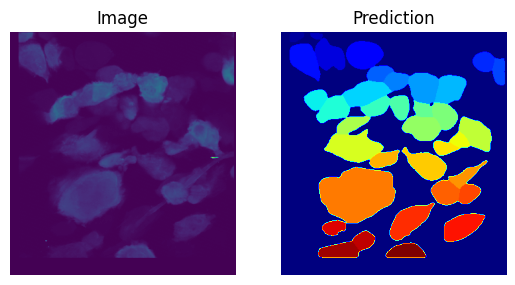

In [ ]:
show_prediction('MAX_registered-0008.tif', masks_cp)

## Show how to use StarDist

In [3]:
import stardist_segmentation as sd

masks_sd = sd.predict('2D_versatile_he', 'TCGA-18-5592-01Z-00-DX1.tif')
print(masks_sd.shape)

KeyboardInterrupt: 

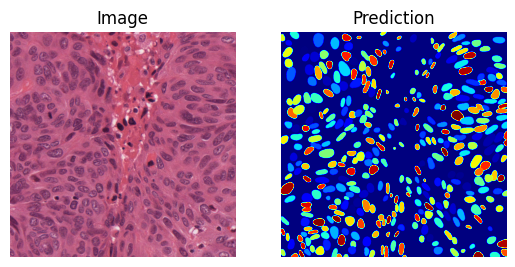

In [4]:
show_prediction('TCGA-18-5592-01Z-00-DX1.tif', masks_sd)

## Show how to use DeepCell

In [3]:
import deepcell_segmentation as dc

masks_dc = dc.predict('CytoplasmSegmentation', 'MAX_registered-0008.tif', image_mpp=.492)
print(masks_dc.shape)

2024-04-18 15:39:57.328573: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(1, 368, 341, 1)


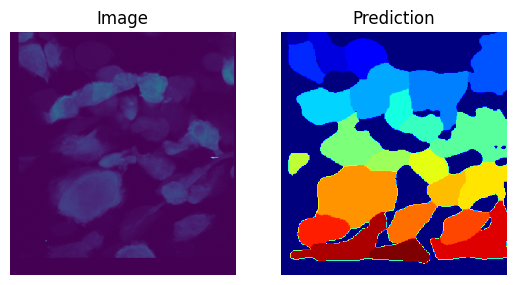

In [4]:
show_prediction('MAX_registered-0008.tif', masks_dc)

## Display testing functionality

In [4]:
def show_metrics(ious, metrics):
    ious = ious
    metric_breakdown = {
        'True Positives': metrics[1],
        'False Positives': metrics[2],
        'False Negatives': metrics[3]
    }

    x = np.arange(len(ious))  # the label locations
    width = 0.25  # the width of the bars
    multiplier = 0

    fig, axs = plt.subplots(ncols=2, figsize=(10,5) , layout='constrained')
    
    axs[0].plot(ious, metrics[0], '.-', lw=2)
    axs[0].set_title('Average Precisions')
    axs[0].set_xlabel('IOU Thresh')

    for name, value in metric_breakdown.items():
        offset = width * multiplier
        rects = axs[1].bar(x + offset, value, width, label=name)
        axs[1].bar_label(rects, padding=3)
        multiplier += 1

    # Add some text for labels, title and custom x-axis tick labels, etc.
    axs[1].set_ylabel('Count')
    axs[1].set_title('Metrics')
    axs[1].set_xticks(x + width, ious)
    axs[1].legend(loc='upper left', ncols=4)

    plt.show()

### Load splice of test data from TissueNet

In [5]:
test_data = np.load(rf"C:\Users\aarus\.deepcell\datasets\tissuenet_v1-1\test.npz")
print(test_data)
X_test = test_data['X'][0:100]
y_test = test_data['y'][0:100]

Test Cellpose evaluation

In [6]:
import cellpose_segmentation as cp

masks = [cp.predict('tissuenet_cp3', x, channels=[2,1], flow_threshold=0.8) for x in X_test]
predictions = np.array(masks)

In [7]:
print(y_test.shape)
print(predictions.shape)

(100, 256, 256, 2)
(100, 256, 256)


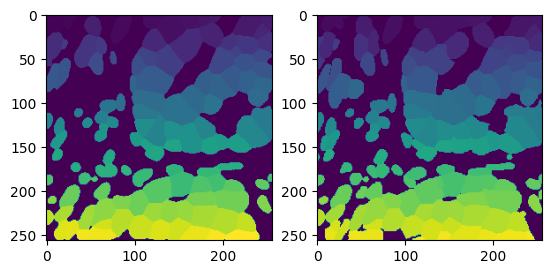

In [8]:
plt.subplot(1,2,1)
plt.imshow(masks[65])
plt.subplot(1,2,2)
plt.imshow(y_test[65,...,0])

In [9]:
y_list = [y for y in y_test[...,0]]

[[3.93053791e-02 1.56231222e-03 3.65630713e-04 ... 1.22249389e-03
  1.71065494e-03 6.14175163e-04]
 [2.25631769e-04 8.65168539e-01 8.13008130e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.32180172e-04 0.00000000e+00 9.14728682e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.43232275e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.14455823e-04 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]
TP: [[227.]] NUMBER PRED: [227] NUMBER TRUE: [631]
iou: 0.1 = 227.0 / (227.0 + 0.0 + 404.0) = 0.35974643423137875


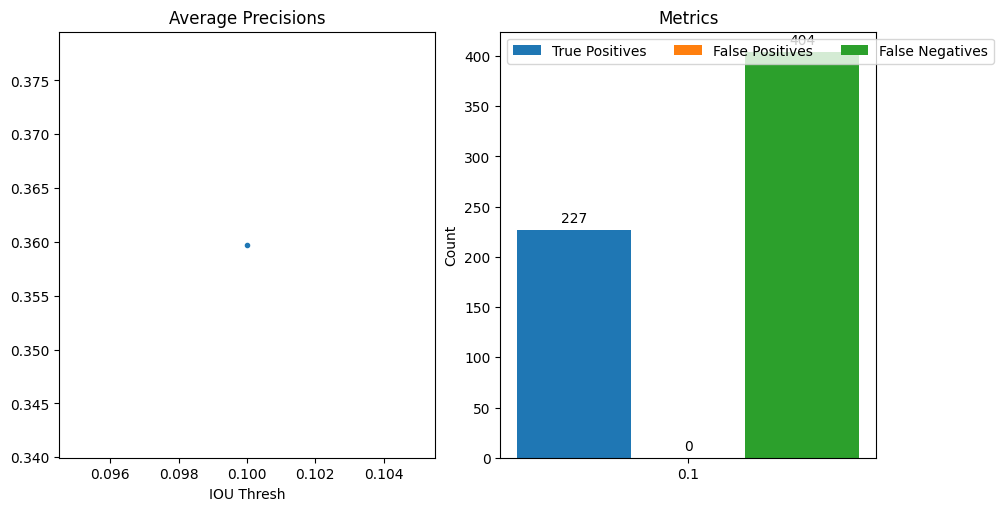

In [10]:
# metrics = cp.evaluate(y_test[...,0], predictions, ious=[0.1, 0.3, 0.5, 0.7, 0.9])
# show_metrics(ious=[0.1, 0.3, 0.5, 0.7, 0.9], metrics=metrics)

metrics = cp.evaluate(np.expand_dims(y_test[0,...,0], 0), np.expand_dims(predictions[0], 0), ious=[0.1])
show_metrics(ious=[0.1], metrics=metrics)

[[0.33333334 0.         0.         0.         0.         0.07407407
  0.03846154 0.         0.06122449 0.         0.06666667 0.        ]
 [0.01149425 0.95       0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.01204819 0.         0.875      0.02272727 0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.51724136 0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.01219512 0.         0.         0.41935483 0.06666667 0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.11111111
  0.         0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.5714286
  0.11538462 0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.5        0

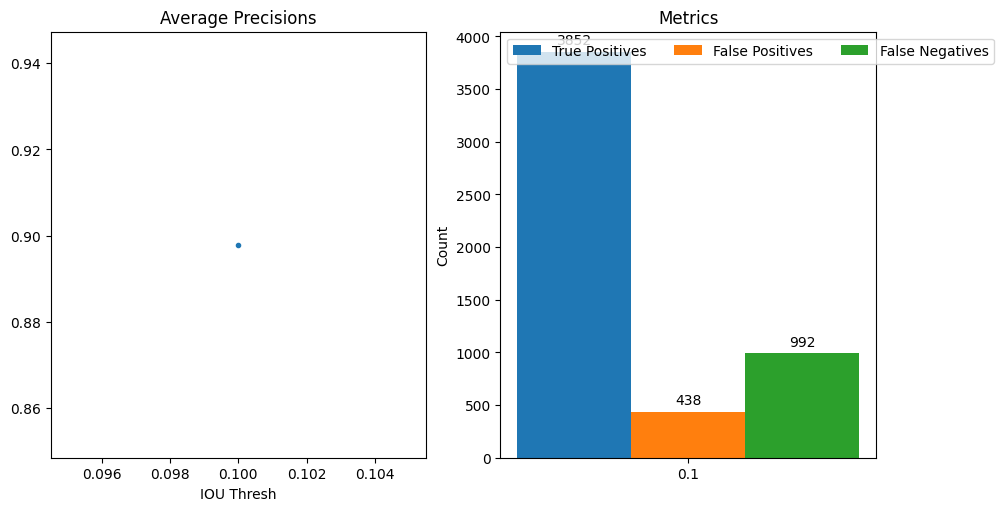

In [11]:
import stardist_segmentation as sd
metrics = sd.evaluate(y_test[0,...,0], predictions[0], ious=[0.1])
show_metrics(ious=[0.1], metrics=metrics)

[[464  13   3 ...  10  14   5]
 [  1 231   3 ...   0   0   0]
 [  1   0 118 ...   0   0   0]
 ...
 [  6   0   0 ...   0   0   0]
 [  3   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
In IOU calc, n_pixels_true = [[8082]
 [ 246]
 [ 121]
 [ 205]
 [  71]
 [ 283]
 [  64]
 [ 241]
 [  51]
 [ 137]
 [ 180]
 [ 179]
 [  47]
 [ 158]
 [  71]
 [ 376]
 [ 130]
 [ 153]
 [ 156]
 [  47]
 [ 217]
 [ 233]
 [  94]
 [ 278]
 [ 287]
 [ 104]
 [ 160]
 [ 152]
 [ 408]
 [ 119]
 [  88]
 [ 174]
 [ 198]
 [ 132]
 [  76]
 [ 230]
 [ 152]
 [  51]
 [ 180]
 [  85]
 [ 297]
 [ 143]
 [ 163]
 [  48]
 [ 158]
 [ 178]
 [  14]
 [ 190]
 [ 201]
 [ 302]
 [ 174]
 [  84]
 [  64]
 [  99]
 [ 167]
 [ 291]
 [ 238]
 [ 132]
 [ 176]
 [  92]
 [  65]
 [  36]
 [ 224]
 [ 138]
 [ 118]
 [ 143]
 [ 238]
 [ 225]
 [  63]
 [  51]
 [  66]
 [ 364]
 [  84]
 [ 358]
 [ 127]
 [ 209]
 [ 247]
 [ 248]
 [  87]
 [ 165]
 [ 376]
 [ 180]
 [ 134]
 [ 172]
 [ 553]
 [  53]
 [  38]
 [ 166]
 [ 227]
 [ 226]
 [ 325]
 [  61]
 [ 122]
 [ 160]
 [ 373]
 [  38]
 [ 106]
 [ 

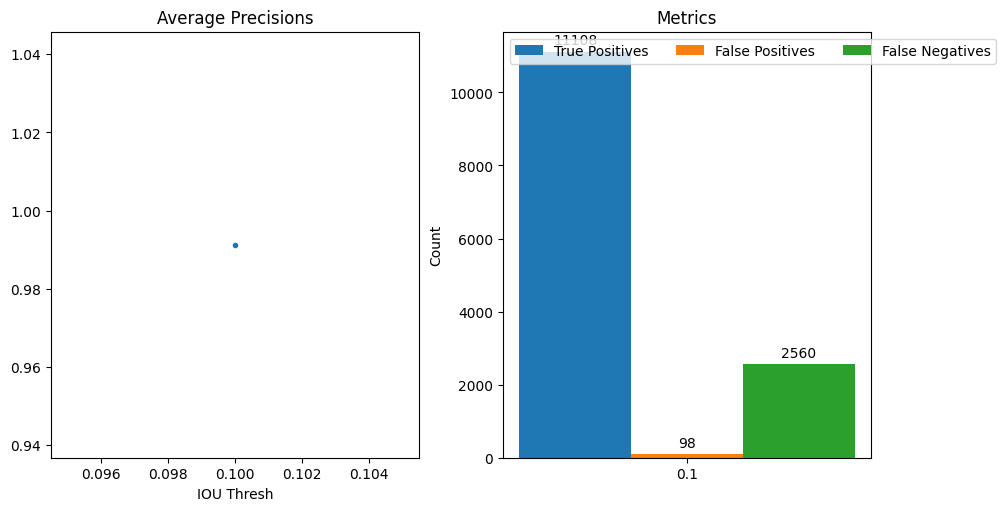

In [45]:
metrics = sd.evaluate(y_test[...,0], predictions, ious=[0.1])
show_metrics(ious=[0.1,], metrics=metrics)


In [12]:
import deepcell_segmentation as dc
metrics = dc.evaluate(y_test[0,..., 0], predictions[0], ious=[0.3])
show_metrics(ious=[0.3], metrics=metrics)

IndexError: index 352 is out of bounds for axis 0 with size 352

### Test with StarDist

In [15]:
import stardist_segmentation as sd
masks = [sd.predict('2D_versatile_fluo', x[...,0]) for x in X_test]
predictions = np.array(masks)

Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=

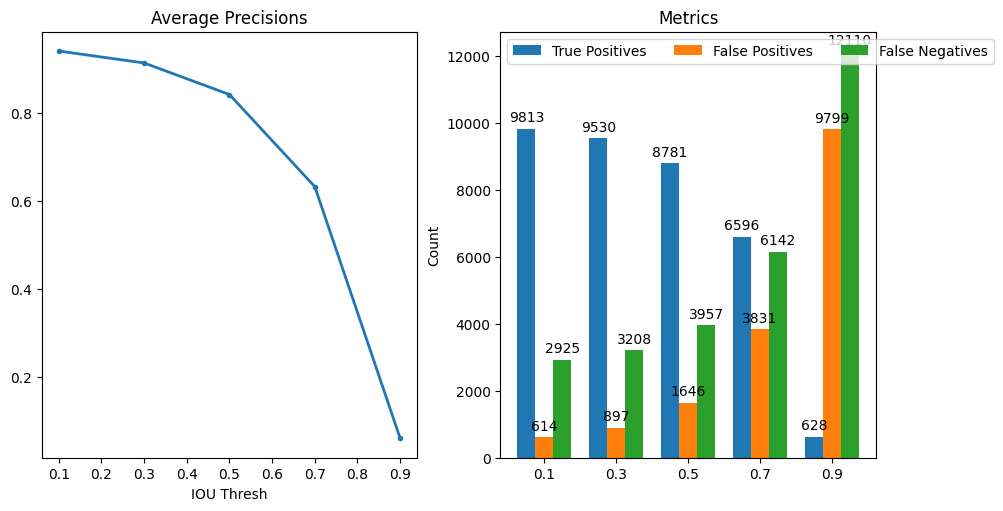

In [20]:
metrics = sd.evaluate(y_test[...,1], predictions, ious=[0.1, 0.3, 0.5, 0.7, 0.9])
show_metrics(ious=[0.1, 0.3, 0.5, 0.7, 0.9], metrics=metrics)

In [13]:
import deepcell_segmentation as dc

masks_dc = dc.predict('Mesmer', X_test, image_mpp=.492, compartment='whole-cell')

INFO:root:Checking for cached data
INFO:root:Checking MultiplexSegmentation-9.tar.gz against provided file_hash...
INFO:root:MultiplexSegmentation-9.tar.gz with hash a1dfbce2594f927b9112f23a0a1739e0 already available.
INFO:root:Extracting C:\Users\aarus\.deepcell\models\MultiplexSegmentation-9.tar.gz
INFO:root:Successfully extracted C:\Users\aarus\.deepcell\models\MultiplexSegmentation-9.tar.gz into C:\Users\aarus\.deepcell\models


[[0.1362942  0.00049068 0.000857   ... 0.00085554 0.00122714 0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.0031407  0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00062854 0.         0.         ... 0.         0.         0.        ]]
[[4.6821401e-01 6.9516856e-04 0.0000000e+00 ... 8.4317033e-04
  1.2630692e-03 5.5517000e-04]
 [5.3676864e-04 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 8.5000002e-01 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.000000

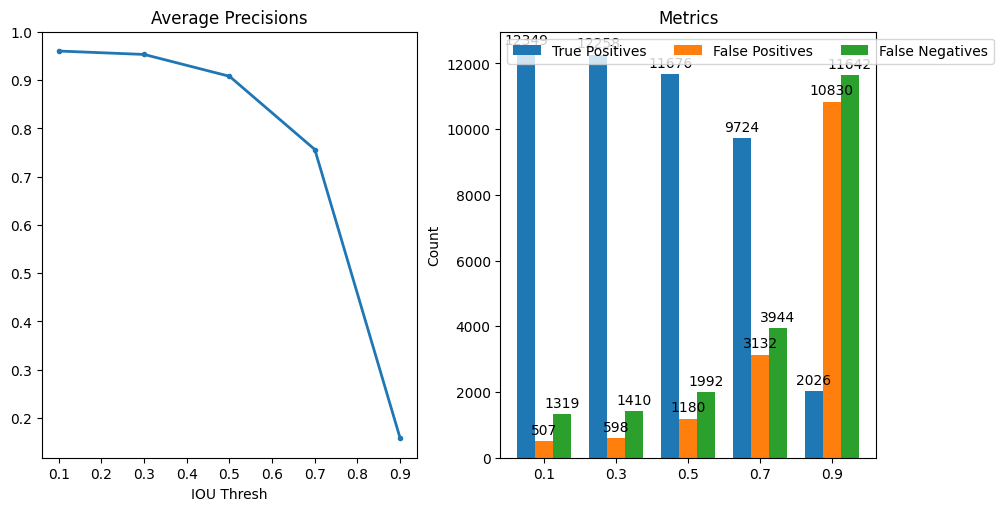

In [20]:
metrics = sd.evaluate(y_test[...,0], masks_dc[...,0], ious=[0.1, 0.3, 0.5, 0.7, 0.9])
show_metrics(ious=[0.1, 0.3, 0.5, 0.7, 0.9], metrics=metrics)

In [19]:
metrics = dc.evaluate(y_test[...,0], masks_dc[...,0], ious=[0.1, 0.3, 0.5, 0.7, 0.9])
show_metrics(ious=[0.1, 0.3, 0.5, 0.7, 0.9], metrics=metrics)

KeyboardInterrupt: 